# Breast Cancer Prediction

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
data = pd.read_csv('breast_cancer.csv')

In [3]:
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

# Splitting Dataset into Training and Testing set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# Training Logistic Regression Model on Training set

In [5]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0)
lg.fit(X_train,y_train)

LogisticRegression(random_state=0)

# Predicting the Test set results

In [6]:
y_pred  =  lg.predict(X_test)

In [7]:
y_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2], dtype=int64)

# Evaluation

In [8]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,y_pred)
print(cf)

[[103   4]
 [  5  59]]


# Accuracy with K-fold validation

In [9]:
from sklearn.model_selection import cross_val_score
accur = cross_val_score(estimator = lg, X = X_train, y = y_train)
print("Accuracy: {:.2f} %".format(accur.mean()*100))
print("Standard Deviation: {:.2f} %".format(accur.std()*100))

Accuracy: 96.68 %
Standard Deviation: 0.79 %


# Training K-Nearest Neighbour on Training set

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Model Performance Evaluation

# Confusion Matrix

In [11]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

Confusion Matrix
[[104   3]
 [  7  57]]
0.9415204678362573


# Classification Report

In [13]:
print('Classification Report')
print(classification_report(y_test,pred))

Classification Report
              precision    recall  f1-score   support

           2       0.94      0.97      0.95       107
           4       0.95      0.89      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



# Choosing the optimum K value

In [14]:
error_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error = np.mean(pred_i == y_test)
    error_rate.append(error)

Text(0, 0.5, 'Error_rate')

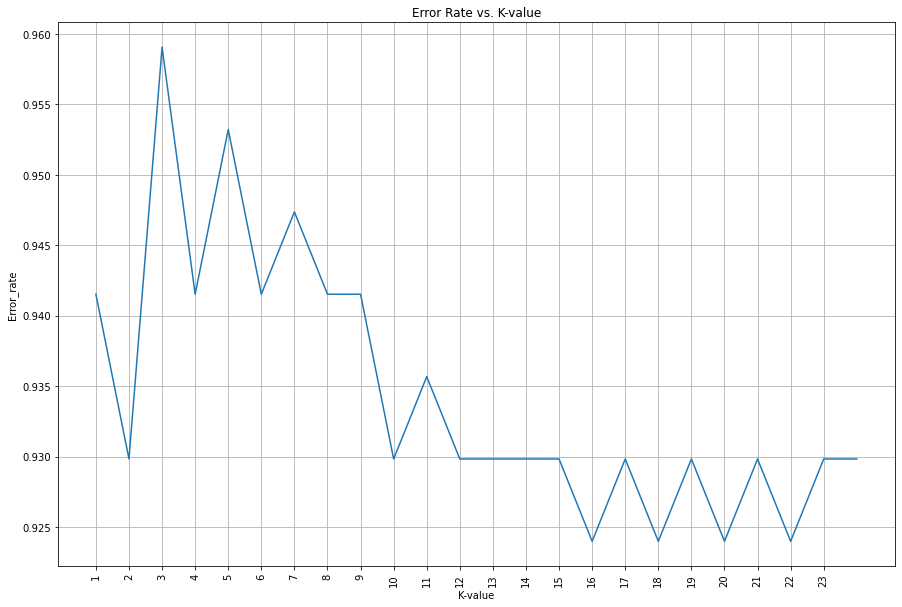

In [15]:
plt.figure(figsize=(15,10))
plt.plot(range(1,25), error_rate)
plt.title("Error Rate vs. K-value")
plt.xticks(list(range(1,24)),rotation=90)
plt.grid()

plt.xlabel('K-value')
plt.ylabel('Error_rate')

In [16]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('With k = 3')
print()
print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))
print()
print("Accuracy Score of the model is: ",accuracy_score(y_test,pred)*100)

With k = 3

[[104   3]
 [  4  60]]

              precision    recall  f1-score   support

           2       0.96      0.97      0.97       107
           4       0.95      0.94      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Accuracy Score of the model is:  95.90643274853801
